## 导入文件

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.set_palette('coolwarm')

# 加载数据集
data_no_g3 = pd.read_csv("cw_data_clear_grade3.csv")

In [3]:
# 想要选择合适特征
import pandas as pd  
from sklearn.feature_selection import SelectKBest, chi2, f_classif   
  
# 分离特征和目标变量  
X = data_no_g3[['Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量（Programme），假设它是分类的  
  
# 由于chi2要求非负输入并且X和y是分类的，我们可以尝试使用chi2（如果X是非负的）  
# 如果X包含负数或者你想使用一个更通用的方法，可以使用f_classif  
  
# 使用chi2（如果特征是非负的）  
# selector = SelectKBest(chi2, k=2)  # 假设我们选择两个最好的特征  
  
# 使用f_classif（对于任何特征）  
selector = SelectKBest(f_classif, k=5)  # 假设我们选择两个最好的特征  
  
# 拟合数据并选择特征  
X_new = selector.fit_transform(X, y)  
  
# 输出选择的特征索引  
print("Selected feature indices:", selector.get_support(indices=True))  
  
# 如果你想把选择的特征转换回DataFrame格式  
# 首先获取特征的名称  
feature_names = X.columns[selector.get_support()]  
# 然后使用这些名称来创建新的DataFrame  
X_new_df = pd.DataFrame(X_new, columns=feature_names)  
  
# 打印新的DataFrame  
print(X_new_df)

Selected feature indices: [0 1 3 5 6]
     Total   MCQ   Q2    Q4   Q5
0     26.0  24.0  0.0   0.0  0.0
1     81.0  48.0  8.0   8.0  3.0
2     49.0  33.0  2.0   0.0  0.0
3     54.0  33.0  2.0   8.0  1.0
4     32.0  24.0  2.0   0.0  0.0
..     ...   ...  ...   ...  ...
576   55.0  33.0  4.0   8.0  0.0
577   41.0  27.0  4.0   0.0  0.0
578   73.0  36.0  8.0  10.0  0.0
579   77.0  42.0  8.0  10.0  3.0
580   22.0  12.0  0.0   2.0  0.0

[581 rows x 5 columns]


# 决策树分类器

Accuracy: 0.5536480686695279
Recall: 0.4877941176470588
F1 Score: 0.480838911200357
              precision    recall  f1-score   support

           1       0.62      0.77      0.68       100
           2       0.33      0.19      0.24        48
           4       0.53      0.51      0.52        85

    accuracy                           0.55       233
   macro avg       0.49      0.49      0.48       233
weighted avg       0.53      0.55      0.53       233


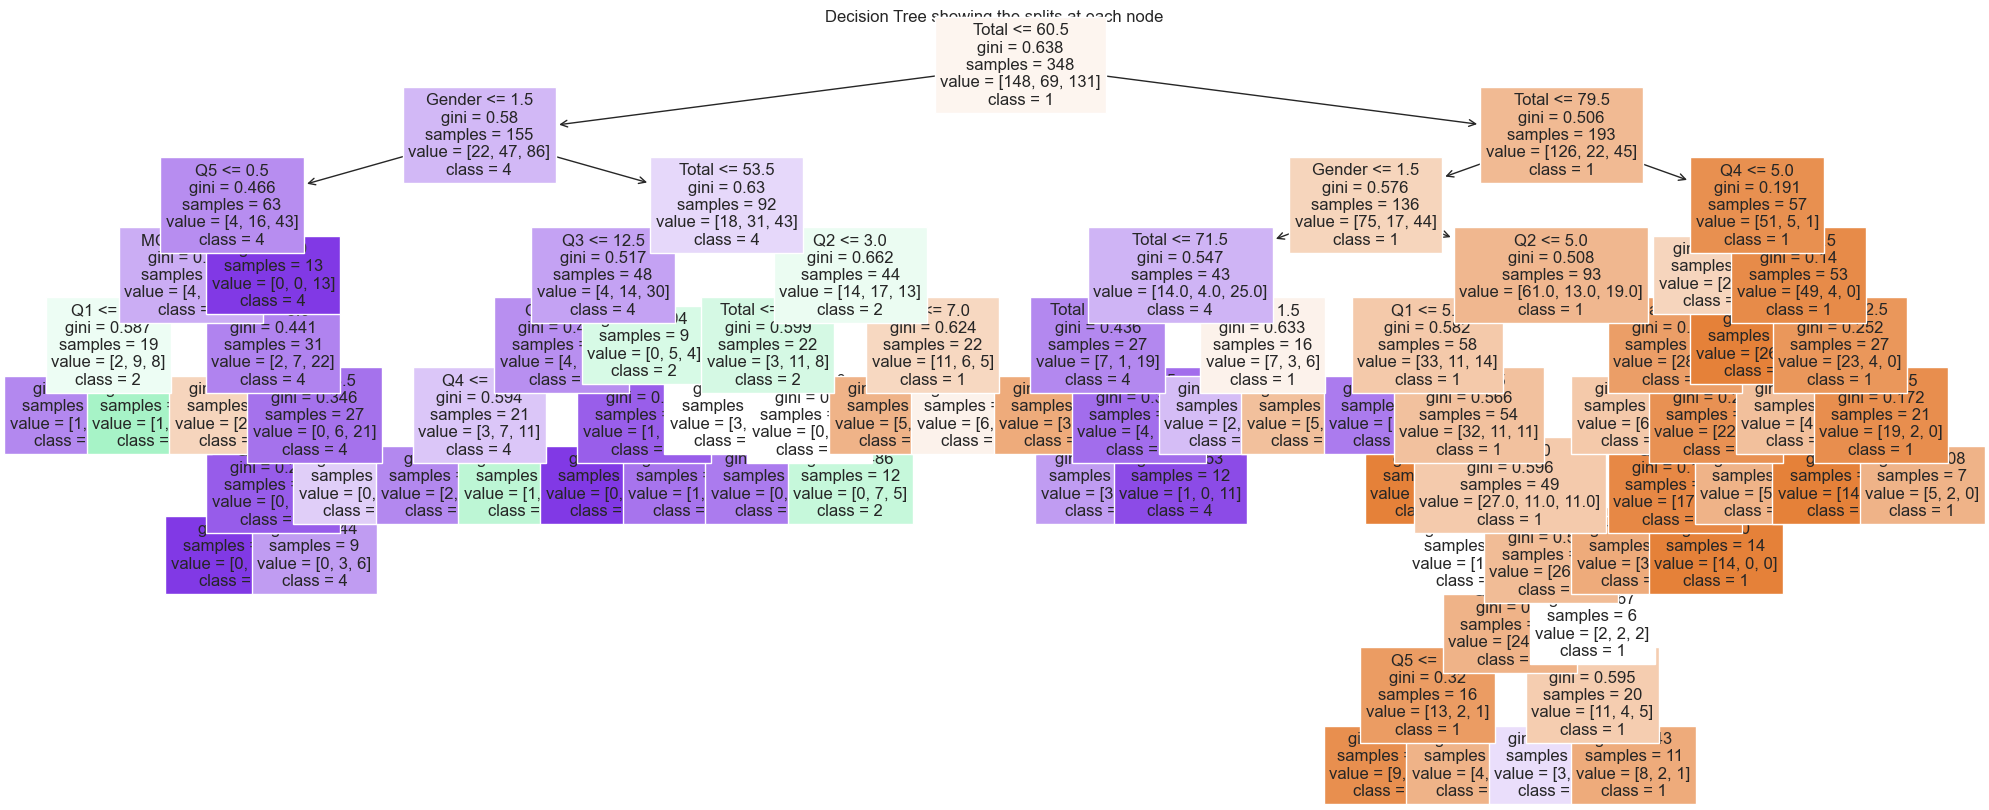

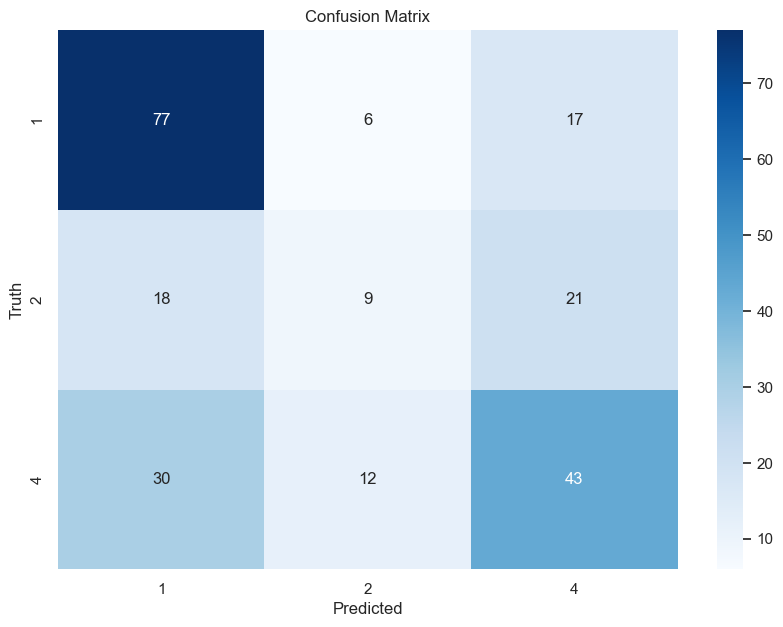

In [4]:
from sklearn.metrics import recall_score, f1_score, classification_report
import pybaobabdt

# 决策树分类器
# 分离特征和目标变量

# X = data_no_g3[['MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征 MCQ  Q1  Q2  Q3  Q4  Q5
X = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征 MCQ  Q1  Q2  Q3  Q4  Q5
y = data_no_g3['Programme']  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# 创建决策树分类器
clf1 = DecisionTreeClassifier(max_depth=None ,min_samples_leaf=4, min_samples_split=16)
# 训练模型
clf1.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = clf1.predict(X_test)

# 计算准确度  
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)

# 可视化决策树
class_names_str = [str(cls) for cls in sorted(y.unique())]  # 将类别转换为字符串
plt.figure(figsize=(25,10))
plot_tree(clf1, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, fontsize=12)
plt.title('Decision Tree showing the splits at each node')
plt.show()


from sklearn.metrics import confusion_matrix  

# 预测测试集的结果  
y_pred = clf1.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  

# 可视化混淆矩阵  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix')  
plt.show()

# ax = pybaobabdt.drawTree(clf1, size=10, dpi=300, features=data_no_g3.columns,ratio=2) #可视化主函数pybaobabdt.drawTree

# 决策树使用网格法优化剪枝

In [79]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=42)
        from imblearn.under_sampling import RandomUnderSampler
        # Step 3: Undersample majority class
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
        
        clf_dt2 = DecisionTreeClassifier()

        # 定义要搜索的参数网格  
        param_grid = {  
            'max_depth': [i for i in range(3, 9, 1)],  
            'min_samples_split': [i for i in range(1, 18, 1)],  
            'min_samples_leaf': [i for i in range(3, 25, 1)],  
        }  
        # 创建GridSearchCV实例  
        grid_search = GridSearchCV(estimator=clf_dt2, param_grid=param_grid, cv=5, n_jobs=-1)  
        # 使用GridSearchCV拟合数据  
        grid_search.fit(X_resampled, y_resampled)  
        # 获取最佳参数和模型  
        best_params = grid_search.best_params_  
        best_dt_model = grid_search.best_estimator_  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_dt_resampled.csv', index=False)

Combinations for n=3:


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Combinations for n=4:


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Combinations for n=5:


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Combinations for n=6:


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Combinations for n=7:


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

Combinations for n=8:
n=3, Combo=('Total', 'MCQ', 'Q2'), Best Params={'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=3, Combo=('Total', 'MCQ', 'Q3'), Best Params={'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=3, Combo=('Total', 'MCQ', 'Q4'), Best Params={'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=3, Combo=('Total', 'Q2', 'Q3'), Best Params={'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=3, Combo=('Total', 'Q3', 'Q4'), Best Params={'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=3, Combo=('Total', 'Q3', 'Q5'), Best Params={'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}, Accuracy=0.5885714285714285
n=4, Combo=('Gender', 'Total', 'Q3', 'Q4'), Best Params={'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}, Accuracy=0.588571428

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
770 fits failed out of a total of 13090.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
770 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valida

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
760 fits failed out of a total of 9120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

Best parameters: {'max_depth': 3, 'min_samples_leaf': 14, 'min_samples_split': 3}
              precision    recall  f1-score   support

           1       0.65      0.87      0.74        71
           2       0.00      0.00      0.00        39
           4       0.56      0.68      0.61        65

    accuracy                           0.61       175
   macro avg       0.40      0.52      0.45       175
weighted avg       0.47      0.61      0.53       175


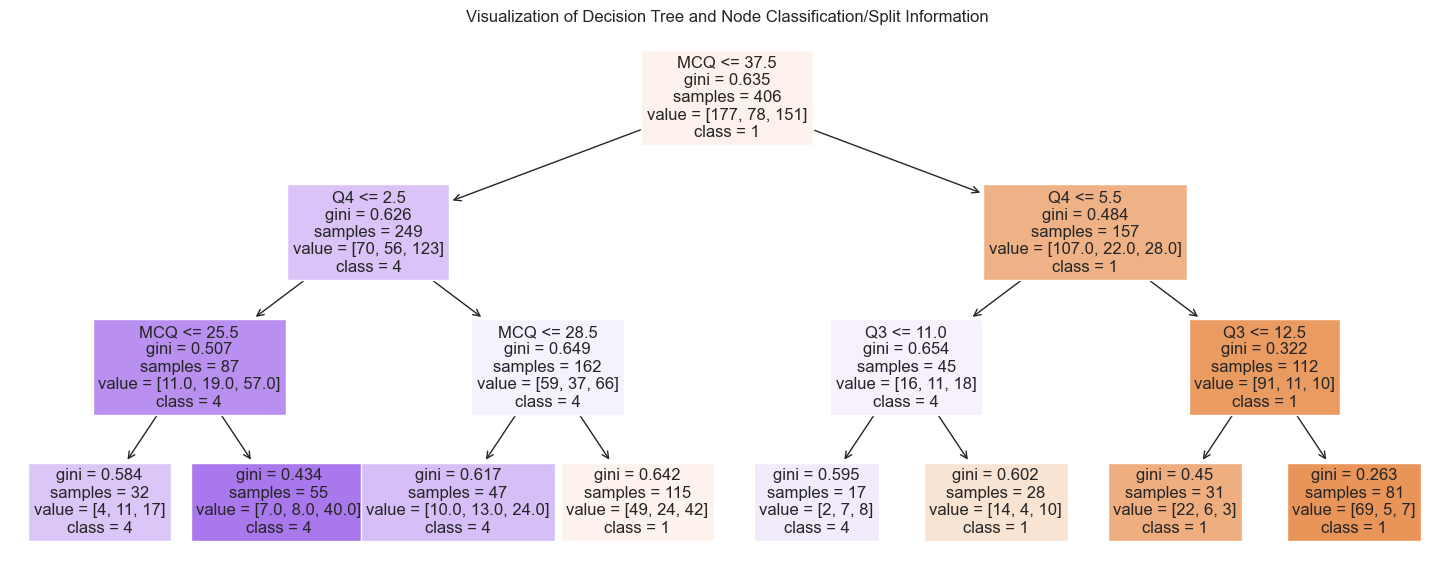

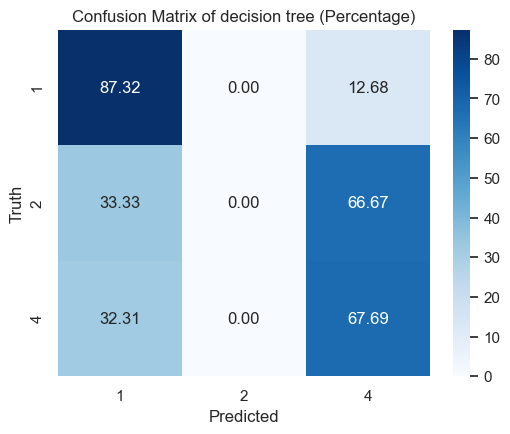

Accuracy: 0.6057142857142858
Precision: 0.46889541892706454
Recall: 0.6057142857142858
F1 Score: 0.5282330576941355


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn.model_selection import GridSearchCV
# 使用网格法优化剪枝
from sklearn.metrics import recall_score, f1_score, classification_report

# 决策树分类器
# 分离特征和目标变量
# X = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征
X = data_no_g3[['MCQ', 'Q1', 'Q3', 'Q4']]  # 特征
# X = data_no_g3[['Gender', 'MCQ', 'Q3', 'Q4']]
y = data_no_g3['Programme']  # 目标变量（Programme）

# # 确保X的列名是字符串
# X.columns = X.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf2 = DecisionTreeClassifier()

# 定义要搜索的参数网格  
param_grid = {  
    'max_depth': [i for i in range(2, 10, 1)],  
    'min_samples_split': [i for i in range(1, 25, 2)],  
    'min_samples_leaf': [i for i in range(1, 20, 1)],  
}
# param_grid = {  
#     'max_depth': [7],  
#     'min_samples_split': [8],  
#     'min_samples_leaf': [3],  
# } 

# 创建GridSearchCV实例  
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, n_jobs=8)  
# 使用GridSearchCV拟合数据  
grid_search.fit(X_train, y_train)  
# 获取最佳参数  
best_params = grid_search.best_params_  
print(f"Best parameters: {best_params}")  

# 获取最佳模型  
best_dt_model = grid_search.best_estimator_  
# 使用最佳模型进行预测  
y_pred = best_dt_model.predict(X_test)  


# 你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)


# 可视化决策树
class_names_str = [str(cls) for cls in sorted(y.unique())]  # 将类别转换为字符串
plt.figure(figsize=(18.5,7))
plot_tree(best_dt_model, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, fontsize=12)
plt.title('Visualization of Decision Tree and Node Classification/Split Information')
plt.show()


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 

# 预测测试集的结果  
y_pred = best_dt_model.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  

import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of decision tree (Percentage)')  
plt.show()

# 计算精度、准确率、召回率和F1分数  
# 注意：precision_score, recall_score, f1_score 需要指定平均方法，例如 'macro', 'micro', 'weighted' 等  
# 这里我们使用 'macro' 作为示例，它计算每个类别的指标，然后找到它们的未加权平均值  
  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
  
# 打印结果  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1 Score:', f1)

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
450 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

Best parameters: {'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 3}
Accuracy: 0.51931330472103
Recall: 0.5143627450980391
F1 Score: 0.4853799309564493
              precision    recall  f1-score   support

           1       0.62      0.71      0.66       100
           2       0.33      0.56      0.42        48
           4       0.61      0.27      0.37        85

    accuracy                           0.52       233
   macro avg       0.52      0.51      0.49       233
weighted avg       0.56      0.52      0.51       233


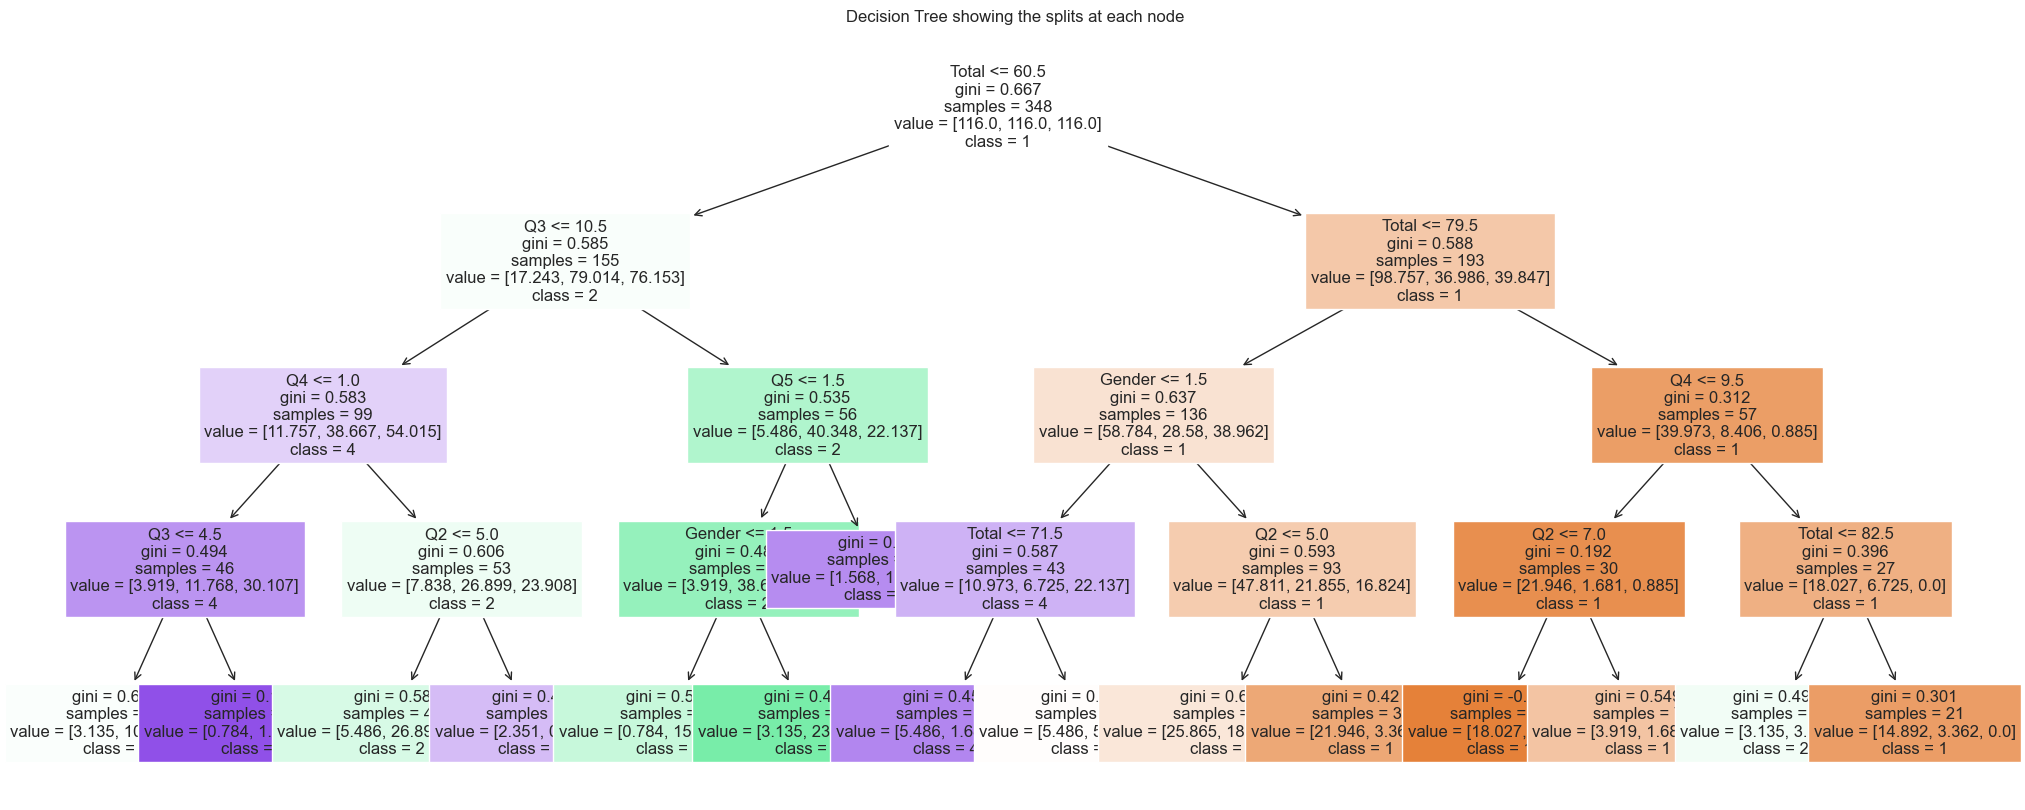

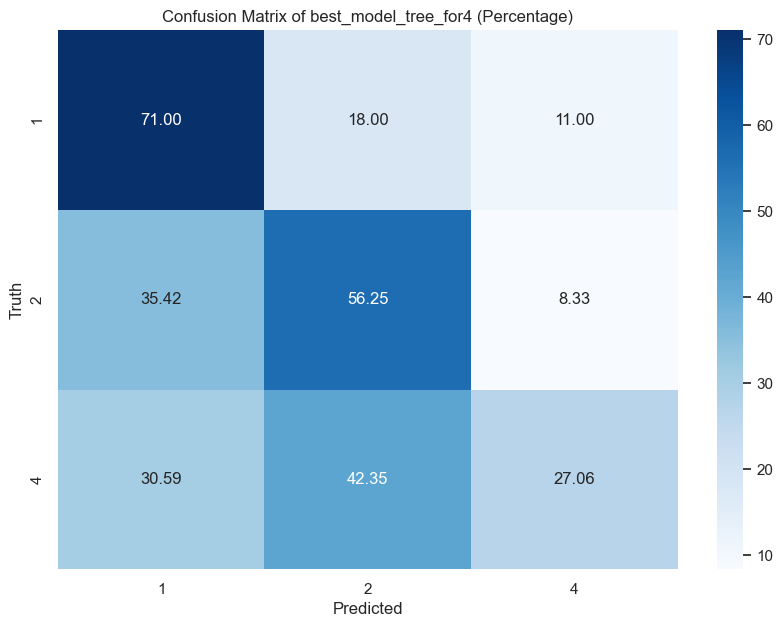

In [6]:
# 专业4特化的决策树
from sklearn.model_selection import GridSearchCV
# 使用网格法优化剪枝
from sklearn.metrics import recall_score, f1_score, classification_report

# 决策树分类器
# 分离特征和目标变量
X = data_no_g3[['Gender','Total','Q1','Q2','Q3','Q4','Q5']]  # 特征
y = data_no_g3['Programme']  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf_tree_for4 = DecisionTreeClassifier(class_weight='balanced')

# 定义要搜索的参数网格  
param_grid = {  
    'max_depth': [i for i in range(2, 8, 1)],  
    'min_samples_split': [i for i in range(1, 15, 2)],  
    'min_samples_leaf': [i for i in range(5, 20, 1)],  
}  
# 创建GridSearchCV实例  
grid_search_tree_for4 = GridSearchCV(estimator=clf_tree_for4, param_grid=param_grid, cv=5, n_jobs=8)  
# 使用GridSearchCV拟合数据  
grid_search_tree_for4.fit(X_train, y_train)  
# 获取最佳参数  
best_params_tree_for4 = grid_search_tree_for4.best_params_  
print(f"Best parameters: {best_params}")  

# 获取最佳模型  
best_model_tree_for4 = grid_search_tree_for4.best_estimator_  
# 使用最佳模型进行预测  
y_pred = best_model_tree_for4.predict(X_test)  

# 计算准确度  
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)

# 可视化决策树
class_names_str = [str(cls) for cls in sorted(y.unique())]  # 将类别转换为字符串
plt.figure(figsize=(25,10))
plot_tree(best_model_tree_for4, filled=True, feature_names=X.columns.tolist(), class_names=class_names_str, fontsize=12)
plt.title('Decision Tree showing the splits at each node')
plt.show()



import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of best_model_tree_for4 (Percentage)')  
plt.show()

Feature ranking:
1. feature 1 (0.271479)
2. feature 2 (0.158914)
3. feature 6 (0.137706)
4. feature 5 (0.108683)
5. feature 4 (0.108540)
6. feature 7 (0.090303)
7. feature 3 (0.063520)
8. feature 0 (0.060857)


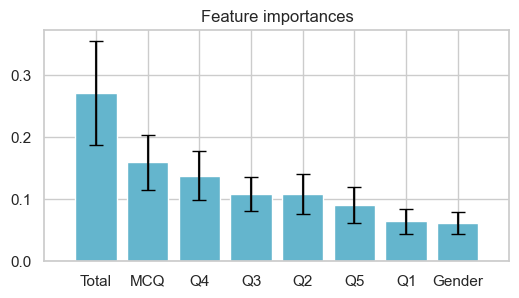

In [26]:
# 通过随机森林找最佳特征
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split   
# 分离特征和目标变量
X = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征
y = data_no_g3['Programme']  # 目标变量（Programme）

  
# 假设X是你的特征矩阵，y是你的目标变量  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  
  
# 初始化随机森林分类器  
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
  
# 训练模型  
rf.fit(X_train, y_train)  
  
# 获取特征重要性  
importances = rf.feature_importances_  
std = np.std([tree.feature_importances_ for tree in rf.estimators_],  
             axis=0)  
indices = np.argsort(importances)[::-1]  
  
# 打印特征排名  
print("Feature ranking:")  
  
for f in range(X.shape[1]):  
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))  
  
# 你可以根据特征重要性来选择特征子集，并重新评估模型性能
# 绘制特征重要性的柱状图  
plt.figure(figsize=(6, 3))  
plt.title("Feature importances")  
plt.bar(range(X.shape[1]), importances[indices],  
       color="c", yerr=std[indices], align="center")  
# 添加方差棒（error bars）  
plt.errorbar(range(X.shape[1]), importances[indices], yerr=std[indices], fmt='none', color='black', capsize=5, linewidth=1)
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])  # 使用真实的列名，如果X是DataFrame  
plt.xlim([-1, X.shape[1]])  
plt.show()


In [8]:
# 通过RFE递归特征消除找到最佳特征组合 RFECV？ 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.feature_selection import RFE  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  
  
# 加载数据  
  
# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  
  
# 初始化随机森林分类器  
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
  
# 初始化RFE  
rfe = RFE(estimator=rf, n_features_to_select=2, step=1)  
  
# 使用RFE拟合模型并转换训练数据  
X_train_rfe = rfe.fit_transform(X_train, y_train)  
  
# 用选出的特征来预测  
y_pred = rf.fit(X_train_rfe, y_train).predict(rfe.transform(X_test))  
  
# 输出模型的准确度  
accuracy = accuracy_score(y_test, y_pred)  
print(f"Accuracy with RFE-selected features: {accuracy}")  
  
# 输出特征排名  
print("Feature ranking:")  
for feature in zip(X.columns, rfe.ranking_):  
    print(f"{feature[0]}: {feature[1]}")  
  
# 特征排名中，1表示该特征被选中，其他数字表示该特征在消除过程中的排名

Accuracy with RFE-selected features: 0.5321888412017167
Feature ranking:
Gender: 7
Total: 1
MCQ: 1
Q1: 6
Q2: 3
Q3: 4
Q4: 2
Q5: 5


# 使用随机森林分类

Best parameters: {'max_depth': 3, 'min_samples_leaf': 14, 'min_samples_split': 3}
              precision    recall  f1-score   support

           1       0.74      0.72      0.73        71
           2       0.42      0.28      0.34        39
           4       0.56      0.69      0.62        65

    accuracy                           0.61       175
   macro avg       0.57      0.56      0.56       175
weighted avg       0.60      0.61      0.60       175


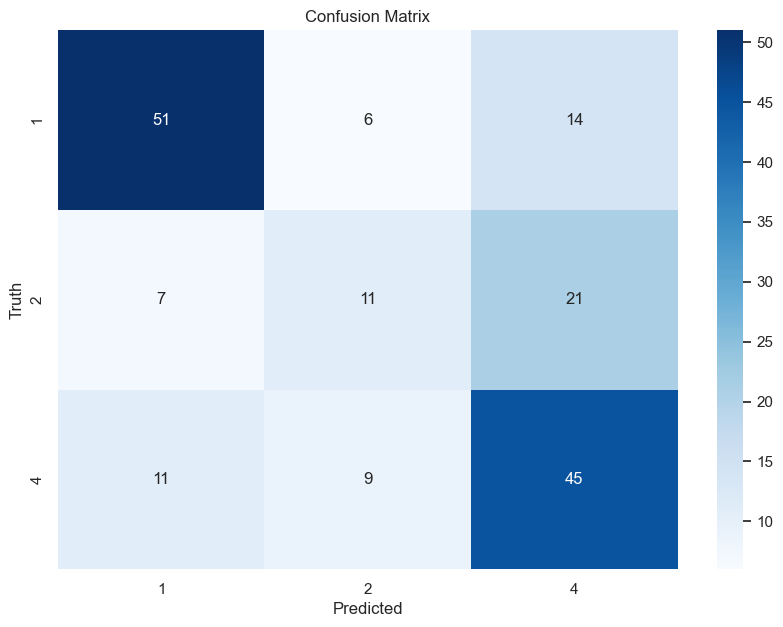

In [78]:
# 使用随机森林分类
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  
  
# 假设data_no_g3是已经加载好的DataFrame  
X_rf = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量  
  
# 划分训练集和测试集  
X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)  

from imblearn.under_sampling import RandomUnderSampler
# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_rf, y_resampled = undersample.fit_resample(X_train_rf, y_train)
  
  
  
  
  
# 定义参数网格  
param_grid = {  
    'n_estimators': [100, 200],  # 尝试不同数量的树  
    'max_depth': [None, 5, 10, 15],      # 尝试不同的最大深度  
    # 'min_samples_split': [1, 2, 3, 4, 10],  # 尝试不同的最小分裂样本数  
    # 'min_samples_leaf': [4, 5, 6],    # 尝试不同的叶子节点最小样本数  
    'random_state': [42]               # 保持随机状态一致以便比较  
}  
  
# 创建随机森林分类器实例  
rf_classifier = RandomForestClassifier()  
  
# 创建网格搜索对象  
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)  
  
# 使用网格搜索进行参数优化和模型训练  
grid_search_rf.fit(X_resampled_rf, y_resampled)  
  
# 获取最佳参数  
best_params_rf = grid_search.best_params_  
print(f"Best parameters: {best_params_rf}")  
  
# 使用最佳参数重新训练模型  
best_rf_classifier = grid_search_rf.best_estimator_  
  
# 使用模型进行预测  
y_pred = best_rf_classifier.predict(X_test_rf)  
  

# # 计算准确度  
# accuracy = accuracy_score(y_test, y_pred)  
# print(f"Accuracy: {accuracy}")
# # 计算召回率  
# # 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# # 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
# recall = recall_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均召回率  
# print(f"Recall: {recall}")
# # 计算 F1 分数  
# # 同样，f1_score 也需要一个 'average' 参数  
# f1 = f1_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均 F1 分数  
# print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

from sklearn.metrics import confusion_matrix  

# 预测测试集的结果  
y_pred = best_rf_classifier.predict(X_test_rf)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  

# 可视化混淆矩阵  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix')
plt.show()

In [10]:
# # 用pybaobabdt可视化随机森林
# 
# import pybaobabdt
# import pandas as pd
# from scipy.io import arff
# import matplotlib.pyplot as plt
# import pygraphviz
# from sklearn.ensemble import RandomForestClassifier  #导入随机森林算法
# 
# size = (15, 20)
# plt.rcParams['figure.figsize'] = size
# fig = plt.figure(figsize=size, dpi=300)
# 
# for idx, tree in enumerate(best_rf_classifier.estimators_):
#     ax1 = fig.add_subplot(5, 4, idx + 1)
#     pybaobabdt.drawTree(tree,
#                         model=best_rf_classifier,
#                         size=1,
#                         dpi=300,
#                         maxdepth=10,
#                         features=list(X_rf.columns),
#                         ax=ax1)

# 使用svm进行分类

In [36]:
# SVM前的数据处理
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import IsolationForest  
  
  
# 去除['MCQ','Q1','Q2','Q3','Q4','Q5']列完全相同的行  
data_no_g3_drop_duplicates = data_no_g3.drop_duplicates(subset=['MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'])  
  
# 使用孤立森林检测异常值  
X_iso = data_no_g3_drop_duplicates.drop('Programme', axis=1)  # 特征变量  
y_iso = data_no_g3_drop_duplicates['Programme']  # 目标变量  
   
iso_clf = IsolationForest(contamination=0.08, random_state=42)  # 去除8%的异常值
y_iso_pred = iso_clf.fit_predict(X_iso)  
  
# 找出异常值的索引，-1表示异常值
outlier_indices = y_iso_pred == -1
# 去除异常值的行
X_clean = X_iso.loc[~outlier_indices]
y_clean = y_iso.loc[~outlier_indices]
# 确保X_clean和y_clean的行数相同  
assert len(X_clean) == len(y_clean), "X_clean and y_clean must have the same number of rows"
print(X_clean)
print(y_clean)
data_no_g3_drop_duplicates_cleaned = pd.DataFrame(pd.concat([X_clean, y_clean], axis=1))
print(data_no_g3_drop_duplicates_cleaned)

# 提取除"Programme"列之外的所有特征列  
X_to_scale = data_no_g3_drop_duplicates_cleaned.drop('Programme', axis=1)  
# 初始化StandardScaler  
scaler = StandardScaler()  
# 对特征进行z-score缩放  
X_scaled = scaler.fit_transform(X_to_scale)  
# 将缩放后的特征转换为DataFrame，使用X_to_scale的列名  
X_scaled_df = pd.DataFrame(X_scaled, columns=X_to_scale.columns)  

X_scaled_df.reset_index(drop=True, inplace=True)  
data_no_g3_drop_duplicates_cleaned['Programme'].reset_index(drop=True, inplace=True)
# 重新合并"Programme"列和标准化后的特征列  
data_no_g3_drop_duplicates_scaled_cleaned = pd.concat([X_scaled_df, data_no_g3_drop_duplicates_cleaned['Programme']], axis=1)  
print(data_no_g3_drop_duplicates_scaled_cleaned)

# # 打印结果以验证  
# print(data_no_g3_drop_duplicates_scaled_cleaned.head())
# print(X_clean.shape)  
# print(y_clean.shape)  
# print(data_no_g3_drop_duplicates_cleaned.shape)  
# print(X_to_scale.shape)  
# print(X_scaled.shape)  
# print(X_scaled_df.shape)  
# print(data_no_g3_drop_duplicates_scaled_cleaned.shape)

     Gender  Total  MCQ  Q1  Q2  Q3    Q4  Q5
1         2   81.0   48   8   8   6   8.0   3
2         2   49.0   33   8   2   6   0.0   0
3         2   54.0   33   6   2   4   8.0   1
4         1   32.0   24   6   2   0   0.0   0
6         2   79.0   39   8   6  14  10.0   2
..      ...    ...  ...  ..  ..  ..   ...  ..
575       2   33.0   27   6   0   0   0.0   0
576       2   55.0   33   6   4   4   8.0   0
577       2   41.0   27   6   4   4   0.0   0
578       2   73.0   36   8   8  11  10.0   0
579       2   77.0   42   8   8   6  10.0   3

[504 rows x 8 columns]
1      1
2      4
3      1
4      2
6      4
      ..
575    4
576    1
577    4
578    1
579    1
Name: Programme, Length: 504, dtype: int64
     Gender  Total  MCQ  Q1  Q2  Q3    Q4  Q5  Programme
1         2   81.0   48   8   8   6   8.0   3          1
2         2   49.0   33   8   2   6   0.0   0          4
3         2   54.0   33   6   2   4   8.0   1          1
4         1   32.0   24   6   2   0   0.0   0         

Best parameters set found on development set:

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.552 (+/-0.277) for {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}
0.581 (+/-0.248) for {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
0.476 (+/-0.165) for {'C': 0.001, 'gamma': 'scale', 'kernel': 'poly'}
0.562 (+/-0.272) for {'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.567 (+/-0.246) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.581 (+/-0.248) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.452 (+/-0.182) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.562 (+/-0.272) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.581 (+/-0.248) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.586 (+/-0.233) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.519 (+/-0.206) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.576 (+/-0.261) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.576 (+/-0.246) for {'C': 1, 'ga

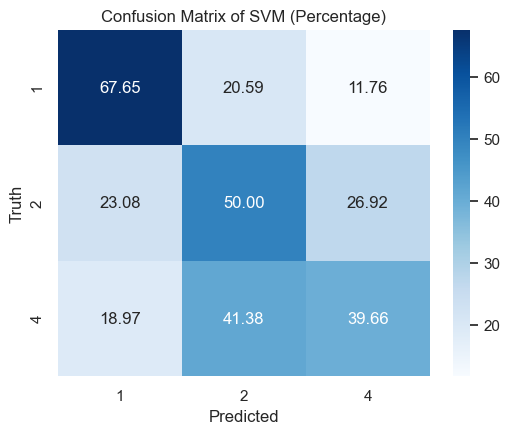

In [39]:
# 使用svm进行分类
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score,  recall_score, f1_score, classification_report
  
# 分离特征和目标变量
X = data_no_g3_drop_duplicates_scaled_cleaned[['Gender', 'Total', 'MCQ','Q1','Q2','Q3','Q4','Q5']]  # 特征
y = data_no_g3_drop_duplicates_scaled_cleaned['Programme']  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]

parameter_space = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 误分类的惩罚参数  
    'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
    'kernel': ['linear', 'rbf', 'poly','sigmoid']  # 核函数类型  
}

# 创建SVM分类器对象  
svc = svm.SVC() 

# 创建SVM分类器对象  
clf_svm_best = GridSearchCV(svc, parameter_space, cv=10, n_jobs=8)  # 使用5折交叉验证
  
# 训练模型并搜索最佳参数
clf_svm_best.fit(X_resampled, y_resampled)


# 打印最佳参数  
print("Best parameters set found on development set:")  
print()  
print(clf_svm_best.best_params_)  
print()  
print("Grid scores on development set:")  
print()  
means = clf_svm_best.cv_results_['mean_test_score']  
stds = clf_svm_best.cv_results_['std_test_score']  
for mean, std, params in zip(means, stds, clf_svm_best.cv_results_['params']):  
    print("%0.3f (+/-%0.03f) for %r"  
          % (mean, std * 2, params))  
print()  


# 使用最佳参数在测试集上进行预测  
y_pred = clf_svm_best.predict(X_test)  
  
# 计算精度、准确率、召回率和F1分数  
# 注意：precision_score, recall_score, f1_score 需要指定平均方法，例如 'macro', 'micro', 'weighted' 等  
# 这里我们使用 'macro' 作为示例，它计算每个类别的指标，然后找到它们的未加权平均值  
  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
  
# 打印结果  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1 Score:', f1)
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)


import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 假设你已经有了 y_test, y_pred, 并且 clf3 和 X_test 已经用于预测  
  
# 预测测试集的结果  
y_pred = clf_svm_best.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of SVM (Percentage)')  
plt.show()

Best parameters set found on development set:

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Grid scores on development set:

0.543 (+/-0.198) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.386 (+/-0.019) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.562 (+/-0.133) for {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.538 (+/-0.214) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.500 (+/-0.052) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.562 (+/-0.155) for {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.581 (+/-0.172) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.510 (+/-0.143) for {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.490 (+/-0.143) for {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

Accuracy: 0.6052631578947368
Recall: 0.565974931086493
F1 Score: 0.5615172202763444
              precision    recall  f1-score   support

           1       0.70      0.71      0.70        68
           2       0.30      0.42      0.35        26
        

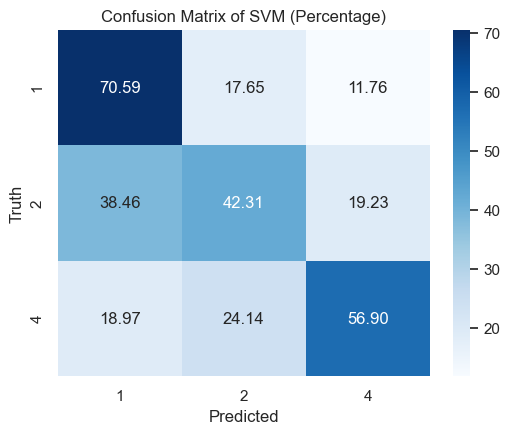

Accuracy: 0.6052631578947368
Precision: 0.6358077184736223
Recall: 0.6052631578947368
F1 Score: 0.6153729764707482


In [41]:
# 使用不同配置的svm进行分类
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score,  recall_score, f1_score, classification_report
  
# 分离特征和目标变量
# X = data_no_g3_drop_duplicates_scaled_cleaned[['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3']]  # 特征
X = data_no_g3_drop_duplicates_scaled_cleaned[['Gender', 'Total', 'Q1', 'Q2', 'Q3']]
y = data_no_g3_drop_duplicates_scaled_cleaned['Programme']  # 目标变量（Programme）

# 确保X的列名是字符串
X.columns = X.columns.astype(str)
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]

# parameter_space = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 误分类的惩罚参数  
#     'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
#     'kernel': ['linear', 'rbf', 'poly','sigmoid']  # 核函数类型  
# }
parameter_space = {
    'C': [0.01, 0.1, 10],  # 误分类的惩罚参数  
    'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
    'kernel': ['rbf', 'poly','sigmoid']  # 核函数类型  
}

# 创建SVM分类器对象  
svc = svm.SVC() 

# 创建SVM分类器对象  
clf_svm_best = GridSearchCV(svc, parameter_space, cv=5, n_jobs=8)  # 使用5折交叉验证
  
# 训练模型并搜索最佳参数
clf_svm_best.fit(X_resampled, y_resampled)


# 打印最佳参数  
print("Best parameters set found on development set:")  
print()  
print(clf_svm_best.best_params_)  
print()  
print("Grid scores on development set:")  
print()  
means = clf_svm_best.cv_results_['mean_test_score']  
stds = clf_svm_best.cv_results_['std_test_score']  
for mean, std, params in zip(means, stds, clf_svm_best.cv_results_['params']):  
    print("%0.3f (+/-%0.03f) for %r"  
          % (mean, std * 2, params))  
print()  


# 使用最佳参数在测试集上进行预测  
y_pred = clf_svm_best.predict(X_test)  
  
# 计算准确度  
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred)  
print(report)

# # 获取所有唯一的类标签，并将它们转换为字符串（如果它们不是字符串的话）
# class_labels = y.unique().astype(str)


import numpy as np  
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 假设你已经有了 y_test, y_pred, 并且 clf3 和 X_test 已经用于预测  
  
# 预测测试集的结果  
y_pred = clf_svm_best.predict(X_test)  
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of SVM (Percentage)')  
plt.show()

# 计算精度、准确率、召回率和F1分数  
# 注意：precision_score, recall_score, f1_score 需要指定平均方法，例如 'macro', 'micro', 'weighted' 等  
# 这里我们使用 'macro' 作为示例，它计算每个类别的指标，然后找到它们的未加权平均值  
  
accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
  
# 打印结果  
print('Accuracy:', accuracy)  
print('Precision:', precision)  
print('Recall:', recall)  
print('F1 Score:', f1)

In [10]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score  
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3_drop_duplicates_scaled_cleaned[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3_drop_duplicates_scaled_cleaned['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=42)
        
        # 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]
        parameter_space = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 误分类的惩罚参数  
            'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
            'kernel': ['linear', 'rbf', 'poly','sigmoid'],  # 核函数类型  
            'decision_function_shape' : ['ovo'],
        }
        
        # 创建SVM分类器对象  
        svc = svm.SVC() 
        # 创建SVM分类器对象  
        clf_svm_best = GridSearchCV(svc, parameter_space, cv=5, n_jobs=-1)  # 使用5折交叉验证
        # 训练模型并搜索最佳参数
        clf_svm_best.fit(X_train, y_train)  
        
         
        # 获取最佳参数和模型  
        best_params = clf_svm_best.best_params_  
        best_dt_model = clf_svm_best.best_estimator_  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_svm_ovo.csv', index=False)

Combinations for n=3:
Combinations for n=4:
Combinations for n=5:
Combinations for n=6:
Combinations for n=7:
Combinations for n=8:
n=3, Combo=('Gender', 'MCQ', 'Q1'), Best Params={'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}, Accuracy=0.6381578947368421
n=6, Combo=('Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3'), Best Params={'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy=0.6381578947368421
n=3, Combo=('Gender', 'MCQ', 'Q5'), Best Params={'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}, Accuracy=0.625
n=4, Combo=('Gender', 'Total', 'Q1', 'Q4'), Best Params={'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy=0.625
n=4, Combo=('Gender', 'Total', 'Q1', 'Q5'), Best Params={'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}, Accuracy=0.625
n=4, Combo=('Gender', 'MCQ', 'Q1', 'Q3'), Best Params={'C': 1, 'decision_function_sha

In [83]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score  
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3_drop_duplicates_scaled_cleaned[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3_drop_duplicates_scaled_cleaned['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=42)
        from imblearn.under_sampling import RandomUnderSampler
        # Step 3: Undersample majority class
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
        
        # 设置SVM的参数网格  [100, 10, 1, 0.1, 0.001, 0.0001]
        parameter_space = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 误分类的惩罚参数  
            'gamma': ['scale'],  # 对于'rbf', 'poly' 和 'sigmoid'  
            'kernel': ['linear', 'rbf', 'poly','sigmoid']  # 核函数类型  
        }
        
        # 创建SVM分类器对象  
        svc = svm.SVC() 
        # 创建SVM分类器对象  
        clf_svm_best = GridSearchCV(svc, parameter_space, cv=5, n_jobs=-1)  # 使用5折交叉验证
        # 训练模型并搜索最佳参数
        clf_svm_best.fit(X_resampled, y_resampled)  
        
         
        # 获取最佳参数和模型  
        best_params = clf_svm_best.best_params_  
        best_dt_model = clf_svm_best.best_estimator_  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_svm_resampled.csv', index=False)

Combinations for n=3:
Combinations for n=4:
Combinations for n=5:
Combinations for n=6:
Combinations for n=7:
Combinations for n=8:
n=5, Combo=('Gender', 'Total', 'Q1', 'Q2', 'Q3'), Best Params={'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy=0.6052631578947368
n=4, Combo=('Total', 'Q1', 'Q2', 'Q3'), Best Params={'C': 10, 'gamma': 'scale', 'kernel': 'poly'}, Accuracy=0.5789473684210527
n=5, Combo=('MCQ', 'Q1', 'Q3', 'Q4', 'Q5'), Best Params={'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy=0.5789473684210527
n=3, Combo=('Gender', 'MCQ', 'Q3'), Best Params={'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'}, Accuracy=0.5723684210526315
n=5, Combo=('Gender', 'MCQ', 'Q1', 'Q4', 'Q5'), Best Params={'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy=0.5723684210526315
n=5, Combo=('MCQ', 'Q1', 'Q2', 'Q3', 'Q5'), Best Params={'C': 10, 'gamma': 'scale', 'kernel': 'poly'}, Accuracy=0.5723684210526315
n=6, Combo=('Gender', 'MCQ', 'Q1', 'Q2', 'Q4', 'Q5'), Best Params={'C':

# 贝叶斯分类器

Naive Bayes Classifier (Under_sampled Data) Performance:
Accuracy: 0.6363636363636364
Recall: 0.6363636363636364
0.6289797244129797
F1 Score: 0.6297012739304509
Confusion Matrix:
 [[69  7  9]
 [ 9 19 14]
 [20 13 38]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        85
           2       0.49      0.45      0.47        42
           4       0.62      0.54      0.58        71

    accuracy                           0.64       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.63      0.64      0.63       198


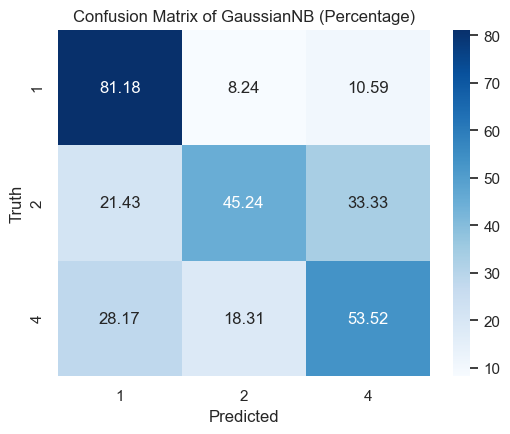


Balanced Bagging Classifier Performance:
Accuracy: 0.6111111111111112
Recall: 0.6111111111111112
0.6022572665429808
F1 Score: 0.6035934612198763
Confusion Matrix:
 [[69  9  7]
 [ 9 16 17]
 [20 15 36]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        85
           2       0.40      0.38      0.39        42
           4       0.60      0.51      0.55        71

    accuracy                           0.61       198
   macro avg       0.57      0.57      0.56       198
weighted avg       0.60      0.61      0.60       198


In [44]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming data_no_g3 is your DataFrame containing the data

# Step 2: Prepare data
X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features
y = data_no_g3['Programme']  # Target variable
# 确保X的列名是字符串
X.columns = X.columns.astype(str)
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Step 5: Build and train the Naive Bayes classifier on under_sampled data
gnb_under_sampled = GaussianNB()
gnb_under_sampled.fit(X_resampled, y_resampled)

# Step 6: Evaluate the Naive Bayes classifier on test data
y_pred_under_sampled = gnb_under_sampled.predict(X_test)
accuracy_under_sampled = accuracy_score(y_test, y_pred_under_sampled)
recall_under_sampled = recall_score(y_test, y_pred_under_sampled, average='weighted')
f1_under_sampled = f1_score(y_test, y_pred_under_sampled, average='weighted')
precision_under_sampled = precision_score(y_test, y_pred_under_sampled, average='weighted')
conf_matrix_under_sampled = confusion_matrix(y_test, y_pred_under_sampled)
class_report_under_sampled = classification_report(y_test, y_pred_under_sampled)

print("Naive Bayes Classifier (Under_sampled Data) Performance:")
print("Accuracy:", accuracy_under_sampled)
print("Recall:", recall_under_sampled)
print(precision_under_sampled)
print("F1 Score:", f1_under_sampled)
print("Confusion Matrix:\n", conf_matrix_under_sampled)
print("Classification Report:\n", class_report_under_sampled)

# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_under_sampled)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(6, 4.5))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of GaussianNB (Percentage)')  
plt.show()



# Step 7: Build and train a Balanced Bagging classifier
bbc = BalancedBaggingClassifier(estimator=GaussianNB(), sampling_strategy='auto', n_estimators=20, random_state=42)
bbc.fit(X_train, y_train)

# Step 8: Evaluate the Balanced Bagging classifier on test data
y_pred_bbc = bbc.predict(X_test)
accuracy_bbc = accuracy_score(y_test, y_pred_bbc)
recall_bbc = recall_score(y_test, y_pred_bbc, average='weighted')
precision_bbc = precision_score(y_test, y_pred_bbc, average='weighted')
f1_bbc = f1_score(y_test, y_pred_bbc, average='weighted')
conf_matrix_bbc = confusion_matrix(y_test, y_pred_bbc)
class_report_bbc = classification_report(y_test, y_pred_bbc)

print("\nBalanced Bagging Classifier Performance:")
print("Accuracy:", accuracy_bbc)
print("Recall:", recall_bbc)
print(precision_bbc)
print("F1 Score:", f1_bbc)
print("Confusion Matrix:\n", conf_matrix_bbc)
print("Classification Report:\n", class_report_bbc)

In [89]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.34, random_state=42)
        
        # Step 3: Undersample majority class
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
        
        # Step 5: Build and train the Naive Bayes classifier on under_sampled data
        gnb_under_sampled = GaussianNB()
        gnb_under_sampled.fit(X_resampled, y_resampled)
        
        # Step 6: Evaluate the Naive Bayes classifier on test data
        y_pred_under_sampled = gnb_under_sampled.predict(X_test)
        accuracy_under_sampled = accuracy_score(y_test, y_pred_under_sampled) 
        
         
        # 获取最佳参数和模型  
        best_params = 'null'
        best_dt_model = gnb_under_sampled  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_gNB_resampled.csv', index=False)

Combinations for n=3:
Combinations for n=4:
Combinations for n=5:
Combinations for n=6:
Combinations for n=7:
Combinations for n=8:
n=6, Combo=('Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6363636363636364
n=7, Combo=('Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6363636363636364
n=4, Combo=('Total', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6161616161616161
n=6, Combo=('Gender', 'Total', 'Q2', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6161616161616161
n=3, Combo=('Total', 'Q3', 'Q5'), Best Params=null, Accuracy=0.6111111111111112
n=5, Combo=('Gender', 'Total', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6111111111111112
n=5, Combo=('Total', 'Q1', 'Q2', 'Q3', 'Q5'), Best Params=null, Accuracy=0.6111111111111112
n=6, Combo=('Gender', 'Total', 'Q1', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6111111111111112
n=7, Combo=('Gender', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.61111111111111

Naive Bayes Classifier (Under_sampled Data) Performance:
Accuracy: 0.6363636363636364
Recall: 0.6363636363636364
F1 Score: 0.6297012739304509
Confusion Matrix:
 [[69  7  9]
 [ 9 19 14]
 [20 13 38]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        85
           2       0.49      0.45      0.47        42
           4       0.62      0.54      0.58        71

    accuracy                           0.64       198
   macro avg       0.60      0.60      0.60       198
weighted avg       0.63      0.64      0.63       198


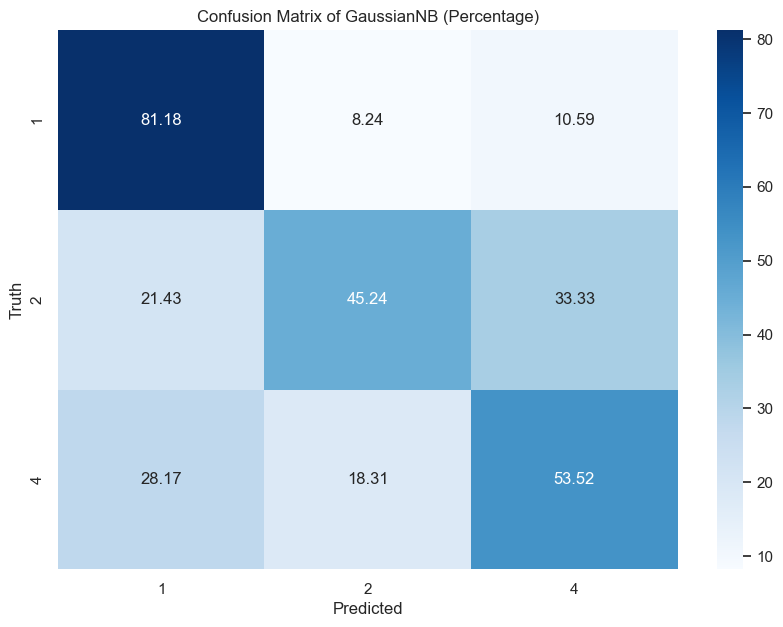


Balanced Bagging Classifier Performance:
Accuracy: 0.6111111111111112
Recall: 0.6111111111111112
F1 Score: 0.6035934612198763
Confusion Matrix:
 [[69  9  7]
 [ 9 16 17]
 [20 15 36]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.81      0.75        85
           2       0.40      0.38      0.39        42
           4       0.60      0.51      0.55        71

    accuracy                           0.61       198
   macro avg       0.57      0.57      0.56       198
weighted avg       0.60      0.61      0.60       198


In [90]:
# 更换输入特征
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier

# Assuming data_no_g3 is your DataFrame containing the data

# Step 2: Prepare data
X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features
y = data_no_g3['Programme']  # Target variable
# 确保X的列名是字符串
X.columns = X.columns.astype(str)
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

# Step 3: Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Step 5: Build and train the Naive Bayes classifier on under_sampled data
gnb_under_sampled = GaussianNB()
gnb_under_sampled.fit(X_resampled, y_resampled)

# Step 6: Evaluate the Naive Bayes classifier on test data
y_pred_under_sampled = gnb_under_sampled.predict(X_test)
accuracy_under_sampled = accuracy_score(y_test, y_pred_under_sampled)
recall_under_sampled = recall_score(y_test, y_pred_under_sampled, average='weighted')
f1_under_sampled = f1_score(y_test, y_pred_under_sampled, average='weighted')
conf_matrix_under_sampled = confusion_matrix(y_test, y_pred_under_sampled)
class_report_under_sampled = classification_report(y_test, y_pred_under_sampled)

print("Naive Bayes Classifier (Under_sampled Data) Performance:")
print("Accuracy:", accuracy_under_sampled)
print("Recall:", recall_under_sampled)
print("F1 Score:", f1_under_sampled)
print("Confusion Matrix:\n", conf_matrix_under_sampled)
print("Classification Report:\n", class_report_under_sampled)

# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_under_sampled)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of GaussianNB (Percentage)')  
plt.show()



# Step 7: Build and train a Balanced Bagging classifier
bbc = BalancedBaggingClassifier(estimator=GaussianNB(), sampling_strategy='auto', n_estimators=20, random_state=42)
bbc.fit(X_train, y_train)

# Step 8: Evaluate the Balanced Bagging classifier on test data
y_pred_bbc = bbc.predict(X_test)
accuracy_bbc = accuracy_score(y_test, y_pred_bbc)
recall_bbc = recall_score(y_test, y_pred_bbc, average='weighted')
f1_bbc = f1_score(y_test, y_pred_bbc, average='weighted')
conf_matrix_bbc = confusion_matrix(y_test, y_pred_bbc)
class_report_bbc = classification_report(y_test, y_pred_bbc)

print("\nBalanced Bagging Classifier Performance:")
print("Accuracy:", accuracy_bbc)
print("Recall:", recall_bbc)
print("F1 Score:", f1_bbc)
print("Confusion Matrix:\n", conf_matrix_bbc)
print("Classification Report:\n", class_report_bbc)



# 逻辑回归

In [11]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.34, random_state=42)
        
        # 初始化逻辑回归模型
        logistic_reg_model = LogisticRegression()
        # 训练模型
        logistic_reg_model.fit(X_train, y_train)
        # # 使用模型进行预测
        # y_pred = logistic_reg_model.predict(X_test)
         
        # 获取最佳参数和模型  
        best_params = 'null'
        best_dt_model = logistic_reg_model  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_logic', index=False)

Combinations for n=3:


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Combinations for n=4:


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Combinations for n=5:


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Combinations for n=6:
Combinations for n=7:
Combinations for n=8:
n=4, Combo=('Total', 'Q1', 'Q3', 'Q5'), Best Params=null, Accuracy=0.6313131313131313
n=4, Combo=('Total', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6313131313131313
n=5, Combo=('Total', 'MCQ', 'Q1', 'Q2', 'Q5'), Best Params=null, Accuracy=0.6313131313131313
n=4, Combo=('MCQ', 'Q1', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6262626262626263
n=5, Combo=('Gender', 'Total', 'Q1', 'Q3', 'Q5'), Best Params=null, Accuracy=0.6262626262626263
n=5, Combo=('Total', 'MCQ', 'Q1', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6262626262626263
n=5, Combo=('Total', 'Q1', 'Q3', 'Q4', 'Q5'), Best Params=null, Accuracy=0.6262626262626263
n=3, Combo=('Total', 'MCQ', 'Q1'), Best Params=null, Accuracy=0.6212121212121212
n=3, Combo=('Total', 'Q1', 'Q5'), Best Params=null, Accuracy=0.6212121212121212
n=3, Combo=('Total', 'Q2', 'Q5'), Best Params=null, Accuracy=0.6212121212121212
n=3, Combo=('Total', 'Q3', 'Q5'), Best Params=null, Accuracy=0.

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

# XGBoost

Accuracy: 0.5364583333333334
Recall: 0.49548858727602685
F1 Score: 0.49519492987876174
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        81
           1       0.38      0.29      0.32        42
           2       0.51      0.52      0.52        69

    accuracy                           0.54       192
   macro avg       0.50      0.50      0.50       192
weighted avg       0.52      0.54      0.53       192


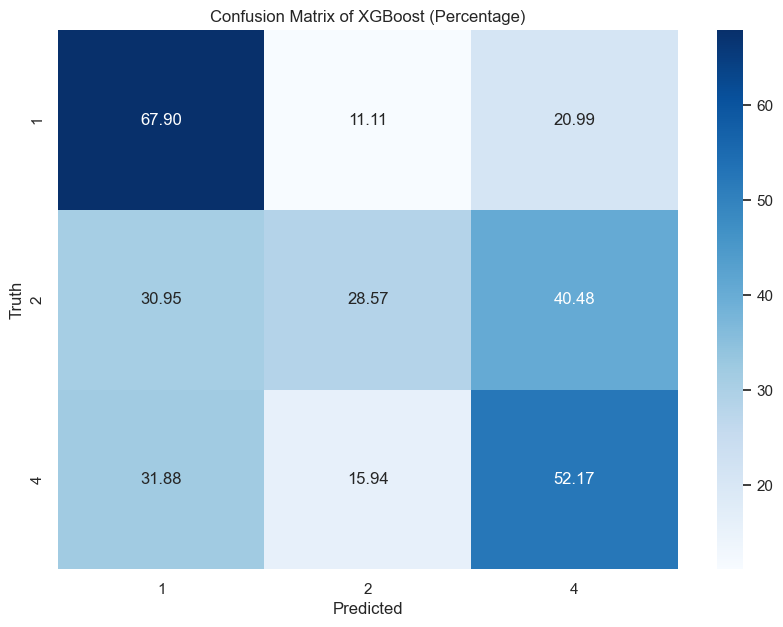

In [16]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder  
  
# 假设 data_no_g3 是已经加载好的 DataFrame  
X = data_no_g3[['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量  
  
# 将类别标签编码为从0开始的整数  
le = LabelEncoder()  
y_encoded = le.fit_transform(y)  
  
# 划分训练集和测试集  
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.33, random_state=42)  
# 创建XGBoost分类器实例  
xgb_clf = XGBClassifier(use_label_encoder=False, objective='multi:softmax', num_class=len(np.unique(y_encoded)))  
# 使用训练集训练模型  
xgb_clf.fit(X_train, y_train_encoded)  
# 使用测试集评估模型  
y_pred_encoded = xgb_clf.predict(X_test)  
# 将预测结果转换回原始标签（如果需要的话）  
y_pred = le.inverse_transform(y_pred_encoded)  
  
# 后续步骤：评估模型性能，进行预测等
# print(y_pred)
# print(y_test)
# 计算准确度  
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test_encoded, y_pred_encoded, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test_encoded, y_pred_encoded, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test_encoded, y_pred_encoded)  
print(report)


from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test_encoded, y_pred_encoded)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of XGBoost (Percentage)')  
plt.show()

# Adaboost

In [93]:
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.metrics import accuracy_score  
from imblearn.under_sampling import RandomUnderSampler
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, classification_report
import pandas as pd  
from sklearn import svm  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
  
# 假设X_all已经被定义为你提供的数据  
X_all = data_no_g3[['Gender','Total','MCQ','Q1','Q2','Q3','Q4','Q5']]  
y = data_no_g3['Programme']  # 目标变量（Programme）
columns = X_all.columns

# 用于存储结果的列表
results = []

# 对于n从3到8
for n in range(3, 9):  # 注意这里包括8，因为range的结束是不包含的  
    # 使用itertools.combinations生成所有可能的组合  
    combinations = list(itertools.combinations(columns, n))
    # 打印出所有组合（如果组合数量太多，可以考虑只打印一部分或保存到文件）  
    print(f"Combinations for n={n}:")  
    for combo in combinations:  
        # print(combo)  
        # 如果你想要基于这些组合构建DataFrame的示例，可以取消注释以下行  
        X_select = X_all[list(combo)]
        # 划分训练集和测试集
        X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=42)
        
        # Step 3: Undersample majority class
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
        
        # 定义要搜索的超参数网格  
        param_grid = {  
            'n_estimators': [i for i in range(10, 40, 1)],  # 尝试不同的弱学习器数量  
            'learning_rate': [1.0, 1.1, 1.2, 1.3],  # 尝试不同的学习率  
            # 你可以添加更多AdaBoostClassifier的超参数到param_grid中  
        }
          
        # Step 5: Build and train the AdaBoost classifier on under_sampled data  
        # AdaBoostClassifier的默认基分类器是决策树桩（DecisionTreeClassifier(max_depth=1)）  
        adb_under_sampled = AdaBoostClassifier(random_state=42, algorithm='SAMME')  
        # 初始化GridSearchCV  
        grid_search = GridSearchCV(estimator=adb_under_sampled, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        # 在下采样后的数据上进行网格搜索  
        grid_search.fit(X_resampled, y_resampled)
        
        # 使用最佳参数构建最终的AdaBoost模型  
        adb_best = AdaBoostClassifier(random_state=42, algorithm='SAMME', **grid_search.best_params_)  
        adb_best.fit(X_resampled, y_resampled)   
        
         
        # 获取最佳参数和模型  
        best_params = grid_search.best_params_
        best_dt_model = adb_best  
          
        # 使用最佳模型进行预测并计算准确度  
        y_pred = best_dt_model.predict(X_test)  
        accuracy = accuracy_score(y_test, y_pred)  
          
        # 存储结果  
        results.append({  
            'n': n,  
            'combo': combo,  
            'best_params': best_params,  
            'accuracy': accuracy  
        })  
  
# 按准确度降序排序结果并打印  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
for result in sorted_results:  
    print(f"n={result['n']}, Combo={result['combo']}, Best Params={result['best_params']}, Accuracy={result['accuracy']}")
# 注意：由于组合数量可能非常大，特别是当n接近8时，所以这里只是打印了组合而没有实际构建DataFrame。  
# 如果你要对每个组合进行模型训练，那么这个过程将非常耗时，并需要相应的资源管理。
# 按准确度降序排序结果  
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)  
# 将结果转换为DataFrame  
df_results = pd.DataFrame(sorted_results)
# 将DataFrame写入CSV文件  
df_results.to_csv('feature_combination_results_adaBoost_resampled.csv', index=False)

Combinations for n=3:
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 120 c

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters set found on development set:

{'learning_rate': 1.0, 'n_estimators': 22}
              precision    recall  f1-score   support

           1       0.80      0.55      0.65        71
           2       0.43      0.67      0.52        39
           4       0.63      0.63      0.63        65

    accuracy                           0.61       175
   macro avg       0.62      0.62      0.60       175
weighted avg       0.65      0.61      0.61       175


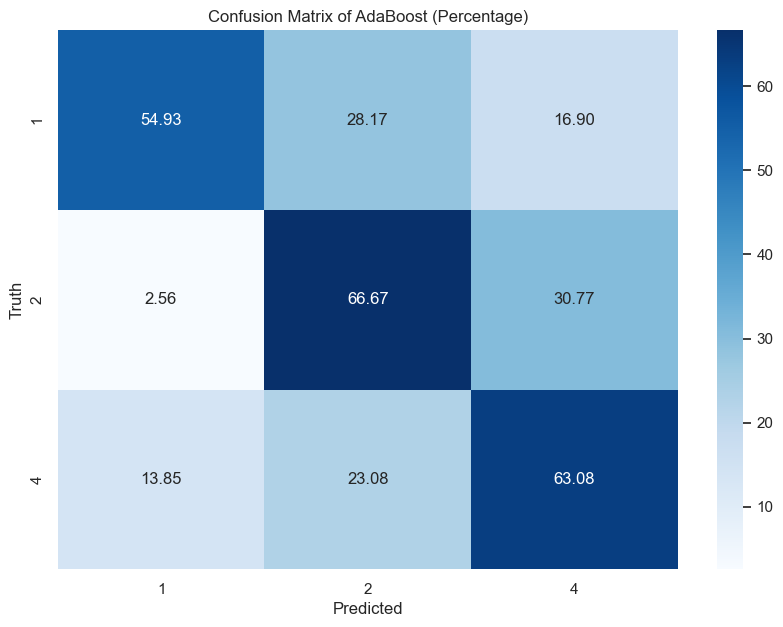

In [97]:
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.metrics import accuracy_score  
from imblearn.under_sampling import RandomUnderSampler  
  
# 假设你已经有了一个包含特征和标签的数据集  
# X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # Features  
X = data_no_g3[['Gender', 'MCQ', 'Q3']]  # Features  
y = data_no_g3['Programme']  # Target variable  
  
# 确保X的列名是字符串（如果它们不是已经是的话）  
X.columns = X.columns.astype(str)  
  
# 将数据分为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
  
# Step 3: Undersample majority class  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)  

# 定义要搜索的超参数网格  
param_grid = {  
    'n_estimators': [i for i in range(10, 40, 1)],  # 尝试不同的弱学习器数量  
    'learning_rate': [1.0, 1.1, 1.2, 1.3],  # 尝试不同的学习率  
    # 你可以添加更多AdaBoostClassifier的超参数到param_grid中  
}
  
# Step 5: Build and train the AdaBoost classifier on under_sampled data  
# AdaBoostClassifier的默认基分类器是决策树桩（DecisionTreeClassifier(max_depth=1)）  
adb_under_sampled = AdaBoostClassifier(random_state=42, algorithm='SAMME')  
# 初始化GridSearchCV  
grid_search = GridSearchCV(estimator=adb_under_sampled, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# 在下采样后的数据上进行网格搜索  
grid_search.fit(X_resampled, y_resampled)
# 输出最佳参数  
print("Best parameters set found on development set:")  
print()  
print(grid_search.best_params_)

# 使用最佳参数构建最终的AdaBoost模型  
adb_best = AdaBoostClassifier(random_state=42, algorithm='SAMME', **grid_search.best_params_)  
adb_best.fit(X_resampled, y_resampled)  
  
# Step 6: Evaluate the AdaBoost classifier on test data  
y_pred_under_sampled = adb_best.predict(X_test)   


report = classification_report(y_test, y_pred_under_sampled)  
print(report)

from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_under_sampled)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of AdaBoost (Percentage)')  
plt.show()

# NN

In [18]:
# import torch  
# import torch.nn as nn  
# import torch.optim as optim  
# from sklearn.model_selection import train_test_split  
# from sklearn.preprocessing import StandardScaler  
# from torch.utils.data import TensorDataset, DataLoader  
# from sklearn.preprocessing import LabelEncoder 
# from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
# 
# # 假设 data_no_g3 是已经加载好的 DataFrame  
# X = data_no_g3[['Gender', 'Total', 'MCQ', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # 特征  
# y = data_no_g3['Programme']  # 目标变量  
# # 实例化 LabelEncoder  
# le = LabelEncoder()  
# 
# # 对目标变量进行编码  
# 
# y = le.fit_transform(y)
# # 数据预处理
# scaler = StandardScaler()  
# X = scaler.fit_transform(X)  
# 
# # 转换为PyTorch tensors  
# X_tensor = torch.tensor(X, dtype=torch.float32)  
# y_tensor = torch.tensor(y, dtype=torch.long)  
# 
# # 划分数据集为训练集和测试集  
# X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)  
# 
# # 创建数据加载器  
# batch_size = 10  
# train_dataset = TensorDataset(X_train, y_train)  
# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)  
# 
# # 定义神经网络模型  
# class MyNet1(nn.Module):    
#     def __init__(self):    
#         super(MyNet1, self).__init__()    
#         self.fc1 = nn.Linear(8, 128)  # 假设输入有8个特征
#         self.ba1 = nn.BatchNorm1d(128)
#         self.fc2 = nn.Linear(128, 256)
#         self.ba2 = nn.BatchNorm1d(256)
#         self.fc3 = nn.Linear(256, 128)
#         self.ba3 = nn.BatchNorm1d(128)
#         self.fc4 = nn.Linear(128, 3)  # 输出层，3个类别  
#         self.dropout = nn.Dropout(0.4)
#         self.relu = nn.LeakyReLU()  # 定义GELU激活函数
#         
#     def forward(self, x):    
#         out = self.relu(self.ba1(self.fc1(x)))  # 添加GELU激活函数  
#         out = self.dropout(out)    
#         out = self.relu(self.ba2(self.fc2(out)))  # 添加GELU激活函数 
#         out = self.dropout(out)
#         out = self.relu(self.ba3(self.fc3(out)))    
#         out = self.fc4(out)  # 使用最后一个线性层  
#         # 注意：这里不需要在fc4之后添加激活函数，因为对于分类问题，通常会在损失函数中应用Softmax  
#         return out
# 
# # 实例化模型  
# model = MyNet1()  
# 
# # 定义损失函数和优化器  
# criterion = nn.CrossEntropyLoss()  
# optimizer = optim.SGD(model.parameters(), lr=0.01)  
# 
# # 使用StepLR调度器，每10个epoch将学习率减半  
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.6)
# 
# # 训练模型  
# num_epochs = 200
# for epoch in range(num_epochs):  
#     for i, (inputs, labels) in enumerate(train_loader):  
#         # 前向传播  
#         outputs = model(inputs)  
#         loss = criterion(outputs, labels)  
# 
#         # 反向传播和优化  
#         optimizer.zero_grad()  
#         loss.backward()  
#         optimizer.step()  
#     scheduler.step()
# 
#     if (epoch+1) % 10 == 0:  
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')  
# 
# # 在测试集上进行预测  
# model.eval()  # 设置为评估模式  
# with torch.no_grad():  
#     correct = 0  
#     total = 0  
#     predictions_all = []  # 用来存储所有的预测结果  
#     labels_all = []  # 用来存储所有的真实标签  
#     for inputs, labels in DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size):  
#         outputs = model(inputs)  
#         _, predicted = torch.max(outputs, 1)  # 不需要.data，因为已经使用了.eval()  
#         total += labels.size(0)  
#         correct += (predicted == labels).sum().item() 
#         predictions_all.extend(predicted.cpu().numpy())  # 存储预测结果  
#         labels_all.extend(labels.cpu().numpy())  # 存储真实标签
# 
# print(f'Accuracy of the network on the test images: {100 * correct / total} %')
# 
# from sklearn.metrics import confusion_matrix, f1_score  
# # 转换为numpy数组  
# predictions = np.array(predictions_all)  
# labels = np.array(labels_all) 
# # 计算混淆矩阵  
# cm = confusion_matrix(labels, predictions)  
# print("Confusion Matrix:")  
# print(cm)
# # 计算F1分数（对于多分类任务，需要为每个类别分别计算，或者计算平均F1分数）  
# f1 = f1_score(labels, predictions, average='macro')  # 或者使用'micro', 'weighted'等  
# print(f"F1 Score: {f1}")
# 
# report = classification_report(labels, predictions)  
# print(report)

# Stacking

Accuracy: 0.6145833333333334
Recall: 0.5684380032206119
F1 Score: 0.5707713824052575
              precision    recall  f1-score   support

           1       0.73      0.78      0.75        81
           2       0.50      0.33      0.40        42
           4       0.53      0.59      0.56        69

    accuracy                           0.61       192
   macro avg       0.59      0.57      0.57       192
weighted avg       0.61      0.61      0.61       192


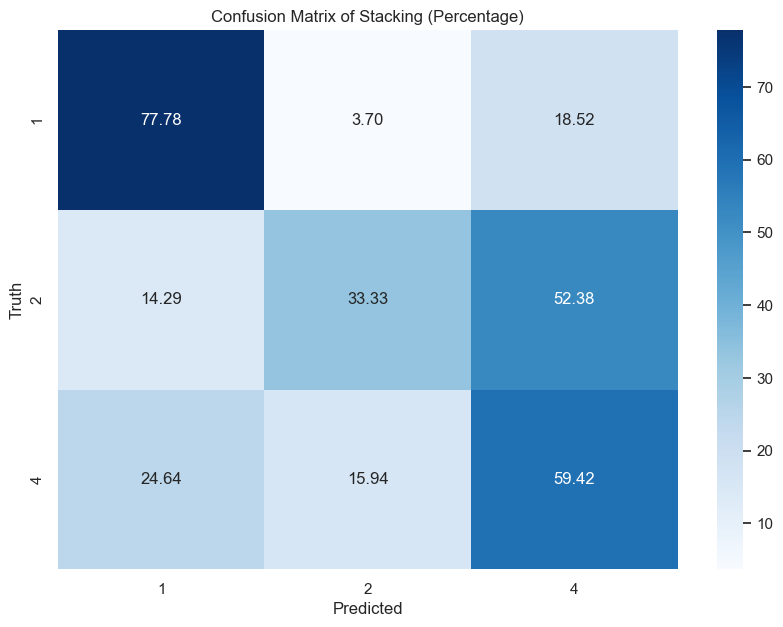

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import StackingClassifier 
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler 
  
# 假设 data_no_g3 是已经加载好的 DataFrame  
X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量  
  
# 划分数据集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 3: Undersample majority class  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


# 定义基学习器  
base_learners = [  
    # ('rf', best_rf_classifier),  
    # ('svm', clf_svm_best),
    # ('adaBoost', adb_best),
    ('GNB', gnb_under_sampled),
    # ('dt', best_dt_model),
    ('tree_for_4', best_model_tree_for4),
    ('tree_for_42', best_model_tree_for4),
]  
  
# 定义元学习器  
final_estimator = LogisticRegression()  
  
# 创建StackingClassifier  
stacking_clf = StackingClassifier(  
    stack_method= 'auto',
    estimators=base_learners,  
    final_estimator=final_estimator,  
    cv=4  # 交叉验证的折数，用于基学习器生成训练元学习器的特征
)  
  
# 训练StackingClassifier  
stacking_clf.fit(X_resampled, y_resampled)  
  
# 预测  
y_pred_re = stacking_clf.predict(X_test)  
  
# 计算准确度  
accuracy = accuracy_score(y_test, y_pred_re)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred_re, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred_re, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred_re)  
print(report)


from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_re)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of Stacking (Percentage)')  
plt.show()

# 软投票

Accuracy: 0.5885416666666666
Recall: 0.5356823351992435
F1 Score: 0.5326381198474222
              precision    recall  f1-score   support

           1       0.68      0.77      0.72        81
           2       0.37      0.26      0.31        42
           4       0.56      0.58      0.57        69

    accuracy                           0.59       192
   macro avg       0.54      0.54      0.53       192
weighted avg       0.57      0.59      0.58       192


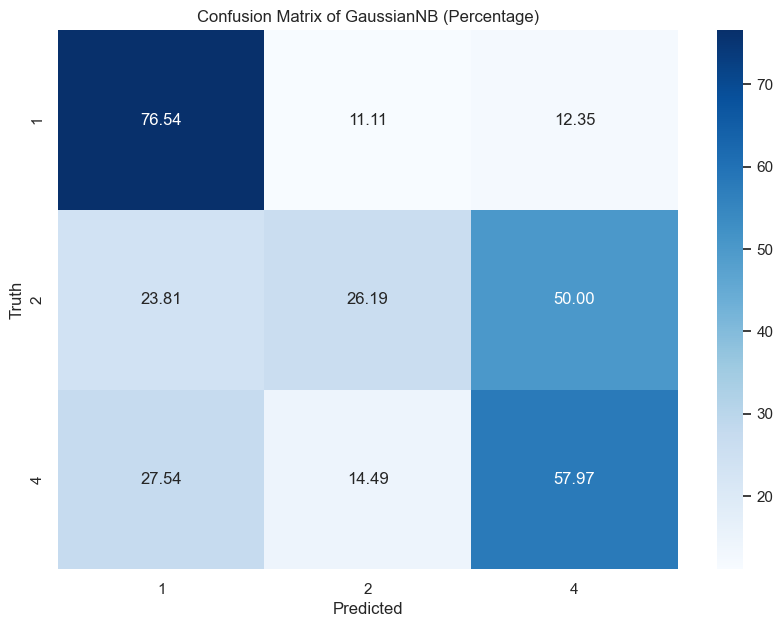

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import StackingClassifier 
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler 
  
# 假设 data_no_g3 是已经加载好的 DataFrame  
X = data_no_g3[['Gender', 'Total', 'Q1', 'Q2', 'Q4', 'Q5']]  # 特征  
y = data_no_g3['Programme']  # 目标变量  
  
# 划分数据集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 3: Undersample majority class  
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)  
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# 定义基学习器  
base_learners = [  
    # ('rf', best_rf_classifier),  #效果一般
    # ('svm', clf_svm_best),
    ('adaBoost', adb_best), #综合效果不错
    ('GNB', gnb_under_sampled), # 综合效果不错
    # ('dt', best_dt_model), # 效果一般
    ('tree_for_4', best_model_tree_for4), # 需要，对2,4分类的特化
]  

# 创建一个VotingClassifier实例，使用'soft'投票  
voting_clf = VotingClassifier(estimators=base_learners, voting='soft',weights=[2,4,1])

# 使用训练集数据拟合VotingClassifier  
voting_clf.fit(X_resampled, y_resampled)  # 这里添加了fit方法

# 使用集成分类器进行预测  
y_pred_soft_vote = voting_clf.predict(X_test)  
  
# # 如果需要的话，你还可以获取每个类别的概率  
# probs = voting_clf.predict_proba(X_test)
# print(probs)

# 计算准确度  
accuracy = accuracy_score(y_test, y_pred_soft_vote)
print(f"Accuracy: {accuracy}")
# 计算召回率  
# 注意：recall_score 需要一个额外的参数 'average'，指定如何计算多分类问题的召回率  
# 例如，可以使用 'micro', 'macro', 'weighted' 或针对每个类别的列表/数组  
recall = recall_score(y_test, y_pred_soft_vote, average='macro')  # 假设你想要计算宏平均召回率  
print(f"Recall: {recall}")
# 计算 F1 分数  
# 同样，f1_score 也需要一个 'average' 参数  
f1 = f1_score(y_test, y_pred_soft_vote, average='macro')  # 假设你想要计算宏平均 F1 分数  
print(f"F1 Score: {f1}")
# 或者，你可以使用 classification_report 来获取一个包含多个指标的详细报告  
report = classification_report(y_test, y_pred_soft_vote)  
print(report)


from sklearn.metrics import confusion_matrix   
# 创建混淆矩阵  
cm = confusion_matrix(y_test, y_pred_soft_vote)  
# 获取类别标签的字符串形式  
class_names_str = [str(cls) for cls in sorted(y.unique())]  
# 计算每行的总和（也可以是每列的总和，取决于你想要展示哪种百分比）  
row_sums = cm.sum(axis=1, keepdims=True)  
# 避免除以零错误  
row_sums[row_sums == 0] = 1  
# 计算百分比并四舍五入到小数点后两位  
cm_percentage = (cm / row_sums) * 100  
cm_percentage = np.round(cm_percentage, 2)  
# 可视化混淆矩阵（百分比形式）  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names_str, yticklabels=class_names_str)  
plt.xlabel('Predicted')  
plt.ylabel('Truth')  
plt.title('Confusion Matrix of GaussianNB (Percentage)')  
plt.show()
